# Matriz de correlação entre ativos no Python! Ações, FIIs, ETFs, BDRs

### 1.0 - Importando bibliotecas

In [1]:
import pandas as pd
import yfinance as yf
import fundamentus as fd
import seaborn as sns
import matplotlib.pyplot as plt

2023-10-09 21:15:08,513 [logging.log_init] INFO: LOGLEVEL=INFO


### 2.0 - Importando dados

#### 2.1 - Parâmetros iniciais

In [2]:
start_date = '2017-01-01'
end_date = '2023-09-25'

#### 2.2 - Moedas, índices e Criptos

In [3]:
cesta = ['USDBRL=X', 'EURBRL=X', '^BVSP', '^GSPC', 'BTC-USD','SMAL11.SA']

In [4]:
cesta = yf.download(cesta, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [5]:
cesta.index = pd.to_datetime(cesta.index)

In [6]:
cesta.head()

,BTC-USD,EURBRL=X,SMAL11.SA,USDBRL=X,^BVSP,^GSPC
Date,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,3.4190,54.000000,3.2532,59589.0,NaN
2017-01-03,1043.839966,3.4320,55.450001,3.2840,61814.0,2257.830078
2017-01-04,1154.729980,3.3976,56.990002,3.2635,61589.0,2270.750000
2017-01-05,1013.380005,3.3732,56.990002,3.2141,62071.0,2269.000000


In [7]:
cesta.rename(columns= {'USDBRL=X': 'USDBRL',
                         'EURBRL=X': 'EURBRL',
                         '^BVSP': 'IBOV',
                         '^GSPC': 'SP500',
                         'BTC-USD': 'BTCUSD',
                         'SMAL11.SA': 'SMALLCAP'},
                         inplace= True)

In [8]:
cesta.head()

,BTCUSD,EURBRL,SMALLCAP,USDBRL,IBOV,SP500
Date,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,3.4190,54.000000,3.2532,59589.0,NaN
2017-01-03,1043.839966,3.4320,55.450001,3.2840,61814.0,2257.830078
2017-01-04,1154.729980,3.3976,56.990002,3.2635,61589.0,2270.750000
2017-01-05,1013.380005,3.3732,56.990002,3.2141,62071.0,2269.000000


#### 2.3 - Ações

2.3.1 - Coletando dados para escolha das ações

In [9]:
# A biblioteca só pega o resultado do último balanço apresentado das empresas

df_acoes = fd.get_resultado()

In [10]:
df_acoes.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,8.65,-3.57,1.18,0.904,0.0000,0.406,-3.18,-604.03,-0.83,-1132.73,16.71,-0.0015,-0.2460,-0.0007,-0.3311,0.55,5582600.0,8.653780e+08,1.15,0.0306
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1489,0.00,0.0,5.420810e+09,0.00,0.1728
ABCB4,19.77,5.54,0.82,0.000,0.0793,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1489,0.00,15481300.0,5.420810e+09,0.00,0.1728
ABEV3,13.22,14.59,2.45,2.518,0.0576,1.562,1029.30,12.78,-16.52,12.26,8.98,0.1970,0.1779,0.1576,0.1678,1.01,353251000.0,8.507460e+10,0.05,0.1416
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641


2.3.2 - Executado filtro conforme parâmetros abaixo:

Preço/Lucro > 0

Ev/Ebit < 10 

ROE > 15%

ROIC > 15%

Dívida Bruta Total / PL < 1

Patrimônio Líquido > 0

Volume médio de transação (2 meses) : R$ 2.250.000,00


In [11]:
filtro_df_acoes = df_acoes[(df_acoes.pl > 0) 
                           & (df_acoes.evebit < 10) 
                           & (df_acoes.roe > 0.15) 
                           & (df_acoes.roic > 0.15) 
                           & (df_acoes.divbpatr < 0.5) 
                           & (df_acoes.patrliq > 0) 
                           & (df_acoes.liq2m > 2250000)
                           ]

In [12]:
filtro_df_acoes[['pl','evebit','roe','roic','divbpatr','patrliq','liq2m']]

Multiples,pl,evebit,roe,roic,divbpatr,patrliq,liq2m
papel,,,,,,,
BLAU3,9.02,7.22,0.1663,0.1890,0.13,1.873920e+09,1.079500e+07
FESA4,6.25,4.67,0.2119,0.2557,0.10,3.220380e+09,1.067720e+07
FRAS3,14.34,7.57,0.1559,0.2171,0.47,1.895920e+09,6.786990e+06
GGBR4,4.48,4.02,0.1952,0.1939,0.22,4.897690e+10,2.625190e+08
KEPL3,6.59,5.11,0.4685,0.4361,0.23,6.686540e+08,1.650850e+07
LEVE3,8.97,7.77,0.4955,0.3632,0.35,1.425640e+09,1.526200e+07
ODPV3,13.71,8.99,0.3332,0.3756,0.00,1.361670e+09,1.544570e+07
PSSA3,9.40,0.25,0.1629,0.6076,0.00,1.145920e+10,4.851470e+07
RECV3,5.87,5.21,0.2312,0.1943,0.14,4.314600e+09,6.746310e+07


In [13]:
index_acoes = filtro_df_acoes.index
index_acoes

Index(['BLAU3', 'FESA4', 'FRAS3', 'GGBR4', 'KEPL3', 'LEVE3', 'ODPV3', 'PSSA3',
       'RECV3', 'TASA4', 'TGMA3', 'VALE3'],
      dtype='object', name='papel')

In [14]:
acoes = []

for elem in index_acoes:
    elem = elem + '.SA'
    acoes.append(elem)

acoes

['BLAU3.SA',
 'FESA4.SA',
 'FRAS3.SA',
 'GGBR4.SA',
 'KEPL3.SA',
 'LEVE3.SA',
 'ODPV3.SA',
 'PSSA3.SA',
 'RECV3.SA',
 'TASA4.SA',
 'TGMA3.SA',
 'VALE3.SA']

2.3.3 - Fazendo download das ações selecionadas pelo filtro

In [15]:
acoes = yf.download(acoes, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  12 of 12 completed


In [16]:
acoes.index = pd.to_datetime(acoes.index)

In [17]:
acoes.head()

,BLAU3.SA,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,PSSA3.SA,RECV3.SA,TASA4.SA,TGMA3.SA,VALE3.SA
Date,,,,,,,,,,,,
2017-01-02,NaN,5.269834,3.318753,7.242329,1.862148,12.983638,9.995234,8.460325,NaN,1.575257,5.395240,15.886398
2017-01-03,NaN,5.374532,3.334189,7.449447,1.903885,13.689198,10.043635,8.626953,NaN,1.601080,5.453021,16.590067
2017-01-04,NaN,5.500171,3.341907,7.362593,1.934921,14.426259,9.922626,8.809302,NaN,1.497785,5.713031,16.292116
2017-01-05,NaN,5.521111,3.426805,7.883720,1.946693,14.646749,9.688680,8.711842,NaN,1.549433,6.059714,16.913374
2017-01-06,NaN,5.549029,3.388216,7.836950,1.883551,14.363264,9.478930,8.548356,NaN,1.506393,5.987489,16.463280


In [18]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1676 entries, 2017-01-02 to 2023-09-22
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BLAU3.SA  609 non-null    float64
 1   FESA4.SA  1676 non-null   float64
 2   FRAS3.SA  1676 non-null   float64
 3   GGBR4.SA  1676 non-null   float64
 4   KEPL3.SA  1676 non-null   float64
 5   LEVE3.SA  1676 non-null   float64
 6   ODPV3.SA  1676 non-null   float64
 7   PSSA3.SA  1676 non-null   float64
 8   RECV3.SA  598 non-null    float64
 9   TASA4.SA  1676 non-null   float64
 10  TGMA3.SA  1676 non-null   float64
 11  VALE3.SA  1676 non-null   float64
dtypes: float64(12)
memory usage: 170.2 KB


In [19]:
# # Removendo empresas com poucos dados

# acoes.drop(['BLAU3.SA','RECV3'], axis= 1)

#### 2.4 - FII

In [20]:
fii = ['BRCR11.SA', 
       'BTLG11.SA', 
       'VINO11.SA', 
       'VILG11.SA',
       'HGRE11.SA',
       'HGLG11.SA',
       'XPML11.SA', 
       'HSML11.SA', 
       'KNCR11.SA'
       ]

In [21]:
fii = yf.download(fii, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  9 of 9 completed


In [22]:
fii.index = pd.to_datetime(fii.index)

In [23]:
fii.head()

,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,VINO11.SA,XPML11.SA
Date,,,,,,,,,
2017-01-02,81.046234,50.713226,93.550003,109.024010,NaN,90.227699,NaN,NaN,NaN
2017-01-03,81.339409,50.678535,93.550003,109.374001,NaN,90.689919,NaN,NaN,NaN
2017-01-04,80.836815,50.678535,93.550003,108.061516,NaN,89.653923,NaN,NaN,NaN
2017-01-05,80.627388,51.155407,93.550003,109.190269,NaN,88.458519,NaN,NaN,NaN
2017-01-06,81.255653,52.117821,93.550003,109.374001,NaN,88.442589,NaN,NaN,NaN


### 3.0 - Tratamento dos dados

Por ter dados em moedas diferentes, será necessário alterar tudo para uma única moeda, no caso farei o estudo utilizando o Real brasileiro.

#### 3.1 - Juntando os DataFrames 

In [24]:
main_df = pd.merge(cesta,
                    acoes,
                    left_index= True,
                    right_index= True,
                    how= 'inner')

main_df.tail()

,BTCUSD,EURBRL,SMALLCAP,USDBRL,IBOV,SP500,BLAU3.SA,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,PSSA3.SA,RECV3.SA,TASA4.SA,TGMA3.SA,VALE3.SA
Date,,,,,,,,,,,,,,,,,,
2023-09-18,26754.281250,5.1653,105.449997,4.8670,118288.0,4453.529785,16.650000,50.009998,14.77,24.940001,11.96,51.029999,10.667602,26.736137,22.389999,16.58,26.090000,68.720001
2023-09-19,27211.117188,5.1852,104.430000,4.8537,117846.0,4443.950195,16.760000,50.040001,15.12,24.590000,11.95,51.619999,10.796725,26.904289,22.299999,16.41,26.250000,68.849998
2023-09-20,27132.007812,5.2004,104.699997,4.8658,118695.0,4402.200195,16.530001,50.480000,15.38,24.969999,11.92,52.520000,10.985445,26.983419,21.770000,16.52,26.430000,69.309998
2023-09-21,26567.632812,5.1973,102.150002,4.8788,116145.0,4330.000000,16.299999,49.450001,15.55,24.389999,11.73,49.520000,11.164231,26.864723,20.990000,16.16,25.840000,67.500000
2023-09-22,26579.568359,5.2564,101.349998,4.9349,116009.0,4320.060059,15.920000,48.799999,15.68,24.260000,11.50,49.799999,11.064906,26.746029,20.450001,16.10,25.799999,68.000000


In [25]:
main_df = pd.merge(main_df,
                    fii,
                    left_index= True,
                    right_index= True,
                    how= 'inner')

main_df.tail()

,BTCUSD,EURBRL,SMALLCAP,USDBRL,IBOV,SP500,BLAU3.SA,FESA4.SA,FRAS3.SA,GGBR4.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,VINO11.SA,XPML11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-18,26754.281250,5.1653,105.449997,4.8670,118288.0,4453.529785,16.650000,50.009998,14.77,24.940001,...,68.720001,63.209999,102.750000,160.588577,136.790253,94.002670,98.682320,105.793861,8.846957,111.950005
2023-09-19,27211.117188,5.1852,104.430000,4.8537,117846.0,4443.950195,16.760000,50.040001,15.12,24.590000,...,68.849998,63.070000,102.559998,160.499191,136.412415,93.754639,98.276794,105.307060,8.837028,111.889999
2023-09-20,27132.007812,5.2004,104.699997,4.8658,118695.0,4402.200195,16.530001,50.480000,15.38,24.969999,...,69.309998,62.799999,101.879997,159.903275,136.849899,93.883614,98.533958,107.224449,8.856887,110.800003
2023-09-21,26567.632812,5.1973,102.150002,4.8788,116145.0,4330.000000,16.299999,49.450001,15.55,24.389999,...,67.500000,62.900002,101.900002,160.677963,137.207840,93.546295,98.365807,105.694511,8.827099,110.000000
2023-09-22,26579.568359,5.2564,101.349998,4.9349,116009.0,4320.060059,15.920000,48.799999,15.68,24.260000,...,68.000000,62.430000,101.500000,159.903275,138.102661,93.556221,97.920715,105.962753,8.787382,110.980003


#### 3.2 - Transformando a moeda de ativos dolarizados e removendo colunas em dólares.

In [26]:
main_df['BTCBRL'] = main_df['BTCUSD'] * main_df['USDBRL']

In [27]:
main_df['SP500BRL'] = main_df['SP500'] * main_df['USDBRL']

In [28]:
main_df = main_df.drop(['BTCUSD','SP500'], axis= 1)

In [29]:
main_df.tail()

,EURBRL,SMALLCAP,USDBRL,IBOV,BLAU3.SA,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,...,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,VINO11.SA,XPML11.SA,BTCBRL,SP500BRL
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-18,5.1653,105.449997,4.8670,118288.0,16.650000,50.009998,14.77,24.940001,11.96,51.029999,...,102.750000,160.588577,136.790253,94.002670,98.682320,105.793861,8.846957,111.950005,130213.089599,21675.329923
2023-09-19,5.1852,104.430000,4.8537,117846.0,16.760000,50.040001,15.12,24.590000,11.95,51.619999,...,102.559998,160.499191,136.412415,93.754639,98.276794,105.307060,8.837028,111.889999,132074.603873,21569.601778
2023-09-20,5.2004,104.699997,4.8658,118695.0,16.530001,50.480000,15.38,24.969999,11.92,52.520000,...,101.879997,159.903275,136.849899,93.883614,98.533958,107.224449,8.856887,110.800003,132018.921006,21420.225287
2023-09-21,5.1973,102.150002,4.8788,116145.0,16.299999,49.450001,15.55,24.389999,11.73,49.520000,...,101.900002,160.677963,137.207840,93.546295,98.365807,105.694511,8.827099,110.000000,129618.164716,21125.203633
2023-09-22,5.2564,101.349998,4.9349,116009.0,15.920000,48.799999,15.68,24.260000,11.50,49.799999,...,101.500000,159.903275,138.102661,93.556221,97.920715,105.962753,8.787382,110.980003,131167.506766,21319.063549


#### 3.3 - Preparando dados para matriz de correlação.

mínimo de dias para não prejudicar a análise. (252 * 3 = 1008) 3 anos

In [30]:
min_dias = 1008

In [31]:
retornos = main_df.pct_change()

In [32]:
retornos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1676 entries, 2017-01-02 to 2023-09-22
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EURBRL     1675 non-null   float64
 1   SMALLCAP   1675 non-null   float64
 2   USDBRL     1675 non-null   float64
 3   IBOV       1675 non-null   float64
 4   BLAU3.SA   608 non-null    float64
 5   FESA4.SA   1675 non-null   float64
 6   FRAS3.SA   1675 non-null   float64
 7   GGBR4.SA   1675 non-null   float64
 8   KEPL3.SA   1675 non-null   float64
 9   LEVE3.SA   1675 non-null   float64
 10  ODPV3.SA   1675 non-null   float64
 11  PSSA3.SA   1675 non-null   float64
 12  RECV3.SA   597 non-null    float64
 13  TASA4.SA   1675 non-null   float64
 14  TGMA3.SA   1675 non-null   float64
 15  VALE3.SA   1675 non-null   float64
 16  BRCR11.SA  1675 non-null   float64
 17  BTLG11.SA  1675 non-null   float64
 18  HGLG11.SA  1675 non-null   float64
 19  HGRE11.SA  1675 non-null   flo

In [33]:
retornos = retornos.dropna(thresh= min_dias, axis= 1)

In [34]:
retornos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1676 entries, 2017-01-02 to 2023-09-22
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EURBRL     1675 non-null   float64
 1   SMALLCAP   1675 non-null   float64
 2   USDBRL     1675 non-null   float64
 3   IBOV       1675 non-null   float64
 4   FESA4.SA   1675 non-null   float64
 5   FRAS3.SA   1675 non-null   float64
 6   GGBR4.SA   1675 non-null   float64
 7   KEPL3.SA   1675 non-null   float64
 8   LEVE3.SA   1675 non-null   float64
 9   ODPV3.SA   1675 non-null   float64
 10  PSSA3.SA   1675 non-null   float64
 11  TASA4.SA   1675 non-null   float64
 12  TGMA3.SA   1675 non-null   float64
 13  VALE3.SA   1675 non-null   float64
 14  BRCR11.SA  1675 non-null   float64
 15  BTLG11.SA  1675 non-null   float64
 16  HGLG11.SA  1675 non-null   float64
 17  HGRE11.SA  1675 non-null   float64
 18  HSML11.SA  1020 non-null   float64
 19  KNCR11.SA  1675 non-null   flo

In [35]:
retornos.head()

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.003802,0.026852,0.009468,0.037339,0.019867,0.004651,0.028598,0.022414,0.054342,0.004842,...,0.044294,0.003617,-0.000684,0.0,0.003210,NaN,0.005123,NaN,0.031292,NaN
2017-01-04,-0.010023,0.027773,-0.006242,-0.003640,0.023377,0.002315,-0.011659,0.016301,0.053843,-0.012048,...,-0.017960,-0.006179,0.000000,0.0,-0.012000,NaN,-0.011423,NaN,0.099327,-0.000556
2017-01-05,-0.007182,0.000000,-0.015137,0.007826,0.003807,0.025404,0.070780,0.006084,0.015284,-0.023577,...,0.038132,-0.002591,0.009410,0.0,0.010445,NaN,-0.013334,NaN,-0.135694,-0.015896
2017-01-06,0.004891,-0.008598,-0.005102,-0.006541,0.005057,-0.011261,-0.005933,-0.032435,-0.019355,-0.021649,...,-0.026612,0.007792,0.018814,0.0,0.001683,NaN,-0.000180,NaN,-0.114254,-0.001603


### 4.0 - Matriz de correlação

### 4.1 - Correlação de Pearson: (Correlação padrão do Pandas)

Quando usar: a correlação de Pearson é adequada quando você está interessado em medir a relação linear entre duas variáveis contínuas. É amplamente utilizado em análises financeiras, pois assume que os dados seguem uma distribuição normal.

Vantagens: é sensível a relações lineares claras e tem interpretação direta. É amplamente conhecido e amplamente utilizado na área financeira.

Limitações: a correlação de Pearson não leva em considerações relações não lineares e pode ser sensível a outliers.

In [36]:
correlacao_pearson = retornos.corr(method= 'pearson')

In [37]:
correlacao_pearson

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,1.000000,-0.015695,0.822595,0.030171,-0.034262,-0.034115,0.017443,-0.022629,-0.012109,-0.031618,...,0.035060,-0.038588,-0.018761,-0.001802,-0.007317,-0.112121,-0.016295,-0.003913,0.199483,0.549927
SMALLCAP,-0.015695,1.000000,-0.008041,0.868907,0.379713,0.489271,0.539159,0.370726,0.489506,0.416534,...,0.396515,0.302513,0.259910,0.260465,0.276944,0.337412,0.197228,0.290108,0.174459,0.393481
USDBRL,0.822595,-0.008041,1.000000,0.036674,-0.027489,-0.032804,0.017464,-0.025304,-0.025567,-0.041063,...,0.024645,-0.034470,-0.056637,0.019242,-0.030088,-0.121247,-0.022759,-0.021494,0.256150,0.646243
IBOV,0.030171,0.868907,0.036674,1.000000,0.417311,0.442191,0.673720,0.345872,0.466855,0.378377,...,0.591254,0.294554,0.261886,0.247922,0.264761,0.302312,0.150765,0.260782,0.202945,0.462677
FESA4.SA,-0.034262,0.379713,-0.027489,0.417311,1.000000,0.225665,0.417111,0.222439,0.281565,0.199608,...,0.366718,0.187172,0.116509,0.099725,0.141263,0.225060,0.073746,0.168223,0.116927,0.172451
FRAS3.SA,-0.034115,0.489271,-0.032804,0.442191,0.225665,1.000000,0.273290,0.267792,0.311127,0.234886,...,0.163175,0.201388,0.157373,0.166504,0.204357,0.302829,0.105884,0.170400,0.146218,0.195189
GGBR4.SA,0.017443,0.539159,0.017464,0.673720,0.417111,0.273290,1.000000,0.227785,0.306673,0.208404,...,0.654465,0.199577,0.196028,0.171079,0.191721,0.235578,0.093395,0.187395,0.168087,0.362065
KEPL3.SA,-0.022629,0.370726,-0.025304,0.345872,0.222439,0.267792,0.227785,1.000000,0.202260,0.130022,...,0.179518,0.148268,0.107866,0.109550,0.106096,0.188429,0.119163,0.159109,0.067241,0.137542
LEVE3.SA,-0.012109,0.489506,-0.025567,0.466855,0.281565,0.311127,0.306673,0.202260,1.000000,0.217579,...,0.235136,0.222830,0.122390,0.121537,0.144076,0.243569,0.049157,0.161974,0.093166,0.197432
ODPV3.SA,-0.031618,0.416534,-0.041063,0.378377,0.199608,0.234886,0.208404,0.130022,0.217579,1.000000,...,0.161477,0.150777,0.096450,0.086311,0.067625,0.144809,0.042468,0.113452,0.023224,0.134602


In [38]:
correlacao_pearson = correlacao_pearson.round(2)

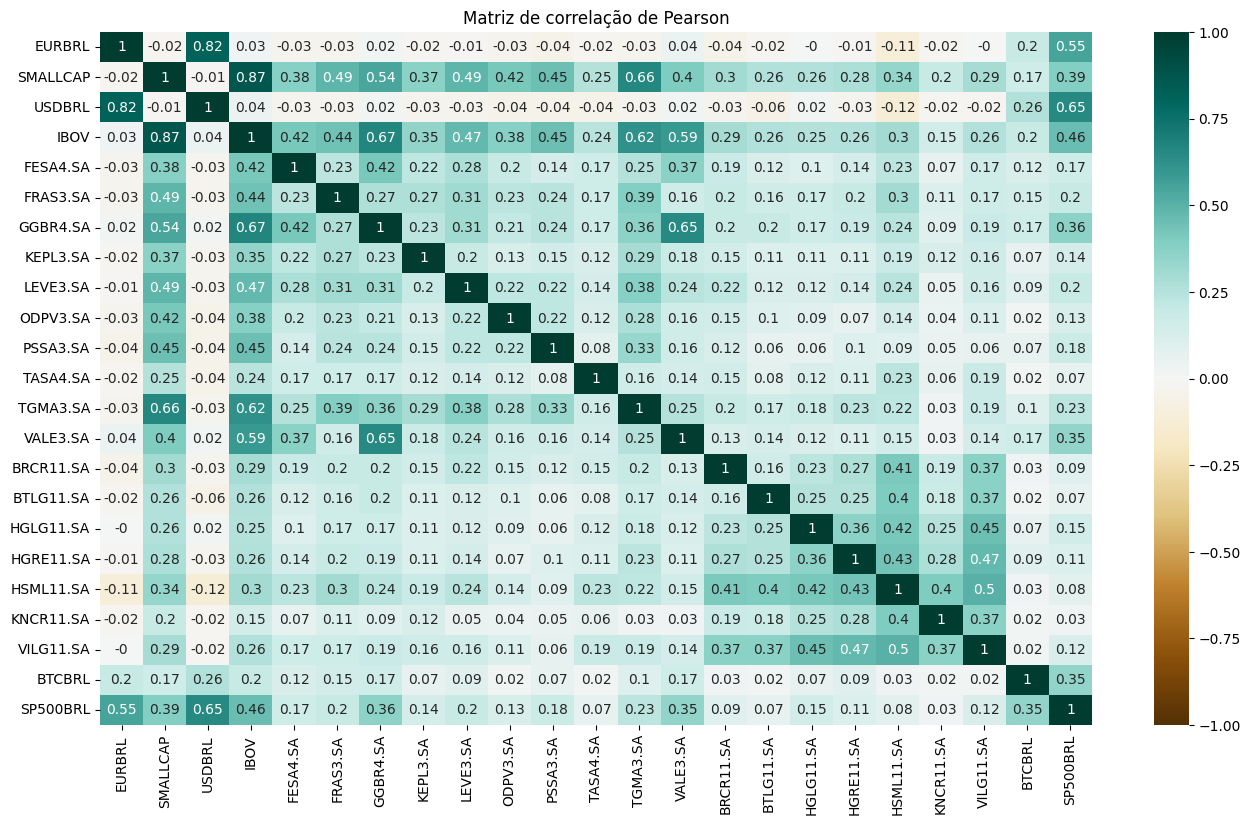

In [39]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_pearson,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Pearson')

plt.show()

### 4.2 - Correlação de Kendall:

Quando usar: a correlação de Kendall é útil quando você está interessado em medir a concordância entre as classificações de duas variáveis. Ela também é não paramétrica e útil quando você não assume uma relação linear.

Vantagens: Boa para detectar relações monotônicas e é robusta a outliers.

Limitações: pode ser computacionalmente mais intensiva para grandes conjuntos de dados.

In [40]:
correlacao_kendall = retornos.corr(method= 'kendall')

In [41]:
correlacao_kendall

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,1.000000,-0.016925,0.644913,0.018813,-0.022179,-0.008810,0.003371,-0.023556,-0.010668,-0.032700,...,0.007588,-0.030104,-0.035495,-0.003755,-0.006021,-0.066648,-0.002404,0.009692,0.183382,0.412000
SMALLCAP,-0.016925,1.000000,-0.004896,0.622173,0.258955,0.278285,0.295022,0.240394,0.300762,0.283489,...,0.213645,0.138975,0.064300,0.084920,0.082999,0.095282,0.032060,0.055318,0.073746,0.187978
USDBRL,0.644913,-0.004896,1.000000,0.028103,-0.014742,-0.007009,0.006669,-0.018972,-0.017387,-0.028934,...,0.011626,-0.039076,-0.046374,-0.003984,-0.015207,-0.064977,0.000315,-0.011553,0.217412,0.510004
IBOV,0.018813,0.622173,0.028103,1.000000,0.280217,0.245834,0.418372,0.229170,0.283624,0.244913,...,0.372981,0.125968,0.077378,0.088084,0.077234,0.076990,0.029510,0.054227,0.096354,0.235738
FESA4.SA,-0.022179,0.258955,-0.014742,0.280217,1.000000,0.140832,0.272071,0.157394,0.168397,0.121587,...,0.232609,0.098505,0.061273,0.079984,0.071293,0.046153,0.023879,0.044790,0.066831,0.105366
FRAS3.SA,-0.008810,0.278285,-0.007009,0.245834,0.140832,1.000000,0.131266,0.160043,0.188534,0.128247,...,0.072332,0.089674,0.054883,0.057297,0.084740,0.108375,0.022647,0.053572,0.063855,0.086502
GGBR4.SA,0.003371,0.295022,0.006669,0.418372,0.272071,0.131266,1.000000,0.142139,0.166770,0.102781,...,0.455469,0.077309,0.058595,0.062261,0.051302,0.043878,0.023789,0.054508,0.085477,0.177274
KEPL3.SA,-0.023556,0.240394,-0.018972,0.229170,0.157394,0.160043,0.142139,1.000000,0.139482,0.095151,...,0.107067,0.063662,0.050100,0.059678,0.055528,0.071171,0.040734,0.044938,0.027654,0.065594
LEVE3.SA,-0.010668,0.300762,-0.017387,0.283624,0.168397,0.188534,0.166770,0.139482,1.000000,0.140045,...,0.123423,0.127598,0.038001,0.064676,0.062402,0.091083,0.003253,0.046736,0.061146,0.097715
ODPV3.SA,-0.032700,0.283489,-0.028934,0.244913,0.121587,0.128247,0.102781,0.095151,0.140045,1.000000,...,0.070300,0.077579,0.023437,0.012910,0.016835,0.067565,0.022733,0.015669,-0.011457,0.063852


In [42]:
correlacao_kendall = correlacao_kendall.round(2)

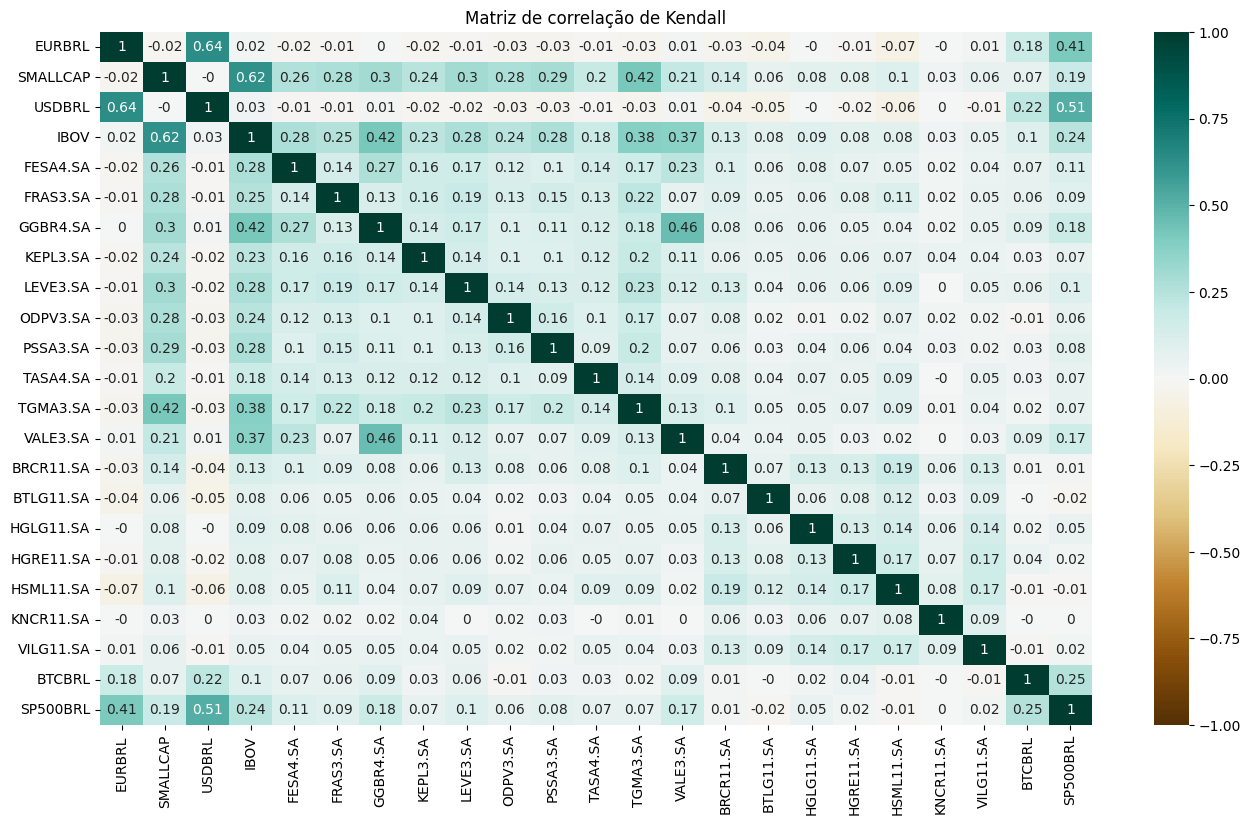

In [43]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_kendall,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Kendall')

plt.show()

### 4.3 - Correlação de Spearman:

Quando usar: a correlação de Spearman é uma opção adequada quando você não tem certeza de que a relação entre as variáveis é linear.

Vantagens: é robusta a outliers e pode detectar relações monotônicas, mesmo que não sejam lineares.

Limitações: pode ser menos sensível a relações lineares claras.

In [44]:
correlacao_spearman = retornos.corr(method= 'spearman')

In [45]:
correlacao_spearman

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,1.000000,-0.024173,0.820187,0.028789,-0.032748,-0.013681,0.005462,-0.034368,-0.015531,-0.048001,...,0.011212,-0.044964,-0.053452,-0.005167,-0.009296,-0.098517,-0.003257,0.014820,0.270056,0.568916
SMALLCAP,-0.024173,1.000000,-0.006602,0.808535,0.374304,0.397213,0.425268,0.346652,0.429834,0.407183,...,0.311558,0.205497,0.095019,0.125971,0.121626,0.140938,0.047984,0.081375,0.109666,0.270652
USDBRL,0.820187,-0.006602,1.000000,0.042315,-0.021162,-0.010764,0.010239,-0.028018,-0.025899,-0.042791,...,0.017485,-0.059178,-0.068975,-0.005632,-0.022723,-0.096821,0.000495,-0.017157,0.318898,0.680227
IBOV,0.028789,0.808535,0.042315,1.000000,0.406341,0.354825,0.586483,0.332197,0.406407,0.354941,...,0.531011,0.186312,0.114249,0.129549,0.114122,0.113461,0.044821,0.080878,0.143264,0.339298
FESA4.SA,-0.032748,0.374304,-0.021162,0.406341,1.000000,0.206309,0.395702,0.230588,0.246147,0.180043,...,0.341764,0.146710,0.090904,0.118552,0.105326,0.068950,0.035042,0.066558,0.100140,0.155782
FRAS3.SA,-0.013681,0.397213,-0.010764,0.354825,0.206309,1.000000,0.192741,0.233201,0.272311,0.188466,...,0.106637,0.132560,0.081452,0.084886,0.124493,0.159536,0.033910,0.078483,0.094701,0.127090
GGBR4.SA,0.005462,0.425268,0.010239,0.586483,0.395702,0.192741,1.000000,0.210081,0.243710,0.152506,...,0.633567,0.114978,0.086156,0.091829,0.075608,0.065371,0.035662,0.079652,0.126964,0.258295
KEPL3.SA,-0.034368,0.346652,-0.028018,0.332197,0.230588,0.233201,0.210081,1.000000,0.204030,0.140182,...,0.158673,0.094319,0.075748,0.089342,0.080245,0.105473,0.061054,0.067213,0.040919,0.097509
LEVE3.SA,-0.015531,0.429834,-0.025899,0.406407,0.246147,0.272311,0.243710,0.204030,1.000000,0.205683,...,0.180789,0.187220,0.056071,0.096061,0.092219,0.133765,0.005001,0.069911,0.090865,0.143421
ODPV3.SA,-0.048001,0.407183,-0.042791,0.354941,0.180043,0.188466,0.152506,0.140182,0.205683,1.000000,...,0.104708,0.115722,0.034308,0.019551,0.024932,0.099864,0.033904,0.024401,-0.017372,0.094532


In [46]:
correlacao_spearman = correlacao_spearman.round(2)

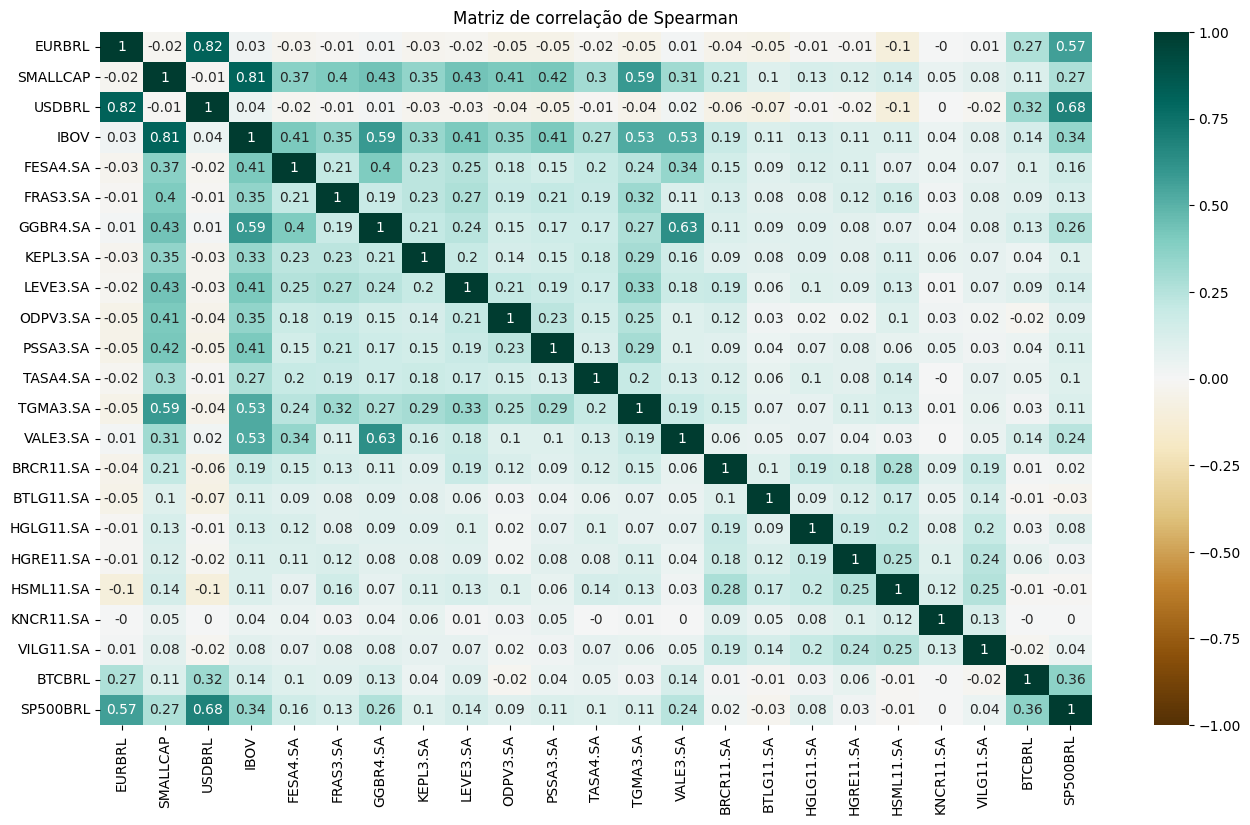

In [47]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_spearman,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Spearman')

plt.show()

### 4.4 - Diferença de Pearson x Kendall:

Uma diferença positiva ao comparar a correlação  de Pearson com a correlação de Kendall (ou seja, Pearson - Kendall > 0) para ativos específicos pode ser interpretada da seguinte forma:

1 - Sensibilidade a Outliers: a correlação de Pearson é sensível a outlier, enquanto a correlação de Kendall é menos afetada por valores extremos.

2 - Relação linear: a correlação de Pearson mede especificamente a relação linear entre as variáveis, enquanto a correlação de Kendall avalia a concordância nas classificações das observações. Portanto, uma diferença positiva pode sugerir que a relação entre os ativos é mais próxima de uma relação linear do que uma relação monotônica.

3 - Assunções de Normalidade: a correlação de Pearson pressupõe que os dados sigam uma distribuição normal, enquanto a correlação de Kendall é não paramétrica e não faz essa suposição. Se os dados não seguem uma distribuição normal, a correlação de Pearson pode ser distorcida, resultando em uma diferença.

4 - Variações locais: a diferença positiva pode indicar que em certos intervalos ou subconjuntos de dados, a relação entre os ativos é mais linear do que em outros. Isso pode ser relevante se você estiver analisando dados financeiros em diferentes períodos ou contextos.

In [48]:
pearson_kendall = correlacao_pearson - correlacao_kendall

In [49]:
pearson_kendall

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,0.00,0.00,0.18,0.01,-0.01,-0.02,0.02,0.00,0.00,0.00,...,0.03,-0.01,0.02,0.00,0.00,-0.04,-0.02,-0.01,0.02,0.14
SMALLCAP,0.00,0.00,-0.01,0.25,0.12,0.21,0.24,0.13,0.19,0.14,...,0.19,0.16,0.20,0.18,0.20,0.24,0.17,0.23,0.10,0.20
USDBRL,0.18,-0.01,0.00,0.01,-0.02,-0.02,0.01,-0.01,-0.01,-0.01,...,0.01,0.01,-0.01,0.02,-0.01,-0.06,-0.02,-0.01,0.04,0.14
IBOV,0.01,0.25,0.01,0.00,0.14,0.19,0.25,0.12,0.19,0.14,...,0.22,0.16,0.18,0.16,0.18,0.22,0.12,0.21,0.10,0.22
FESA4.SA,-0.01,0.12,-0.02,0.14,0.00,0.09,0.15,0.06,0.11,0.08,...,0.14,0.09,0.06,0.02,0.07,0.18,0.05,0.13,0.05,0.06
FRAS3.SA,-0.02,0.21,-0.02,0.19,0.09,0.00,0.14,0.11,0.12,0.10,...,0.09,0.11,0.11,0.11,0.12,0.19,0.09,0.12,0.09,0.11
GGBR4.SA,0.02,0.24,0.01,0.25,0.15,0.14,0.00,0.09,0.14,0.11,...,0.19,0.12,0.14,0.11,0.14,0.20,0.07,0.14,0.08,0.18
KEPL3.SA,0.00,0.13,-0.01,0.12,0.06,0.11,0.09,0.00,0.06,0.03,...,0.07,0.09,0.06,0.05,0.05,0.12,0.08,0.12,0.04,0.07
LEVE3.SA,0.00,0.19,-0.01,0.19,0.11,0.12,0.14,0.06,0.00,0.08,...,0.12,0.09,0.08,0.06,0.08,0.15,0.05,0.11,0.03,0.10
ODPV3.SA,0.00,0.14,-0.01,0.14,0.08,0.10,0.11,0.03,0.08,0.00,...,0.09,0.07,0.08,0.08,0.05,0.07,0.02,0.09,0.03,0.07


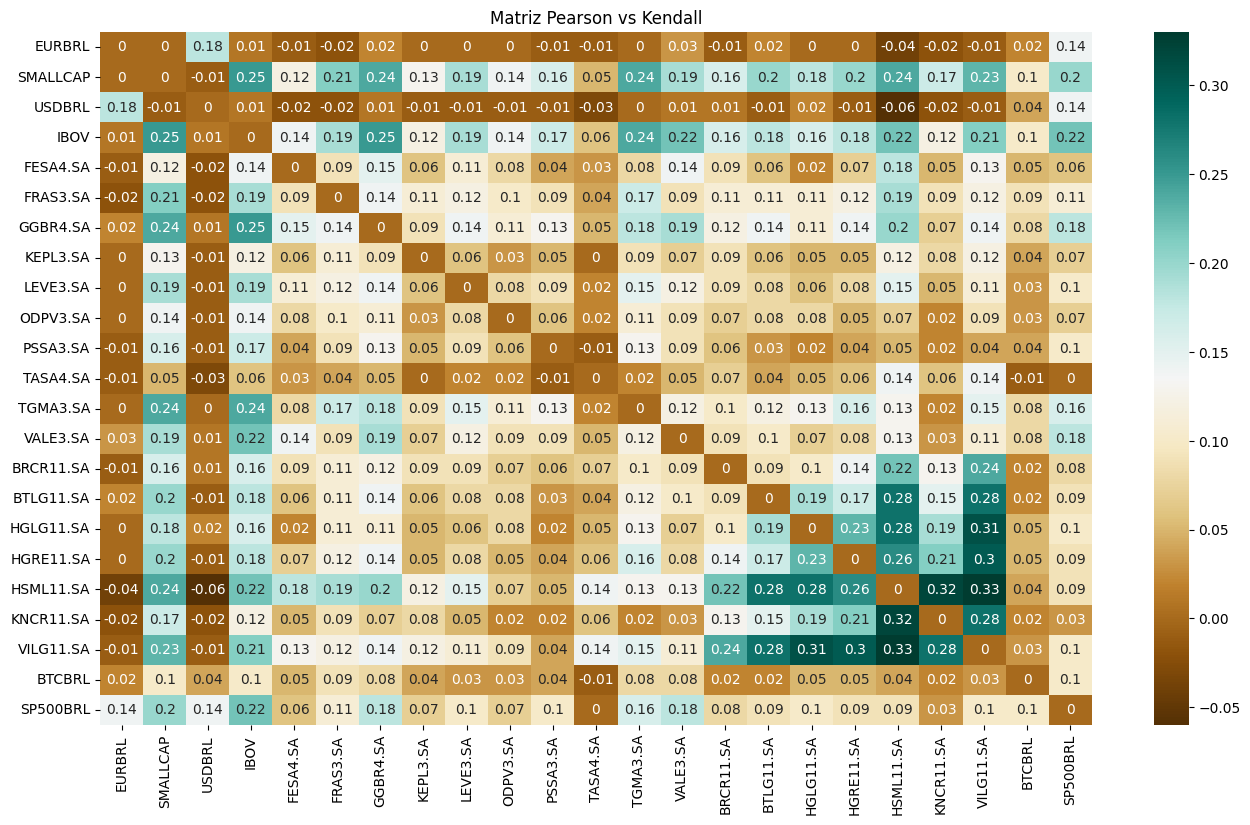

In [50]:
plt.figure(figsize = (16,9))

sns.heatmap(pearson_kendall,
             annot = True, cmap = 'BrBG')

plt.title('Matriz Pearson vs Kendall')

plt.show()

### 4.5 - Diferença de Pearson x Spearman:

1 - Relação linear: a correlação de Pearson é mais sensível a relações lineares claras entre as variáveis. Se a diferença entre Pearson e Spearman é pequena, isso pode indicar que a relação entre os ativos é predominantemente linear. Em outras palavras, as variações nos retornos dos ativos estão mais alinhadas de forma linear.

2 - Robustez a outliers: a correlação de Spearman é menos sensível a outliers do que a correlação de Pearson. A diferença negativa pode ser devido à presença de outliers que afetaram a correlação de Pearson mais significativamente do que a correlação de Spearman.

3 - Não linearidades leves: a diferença positiva pode sugerir que, embora a relação geral seja linear, pode haver algumas não linearidades leves na relação entre os ativos que a correlação de Pearson não captura, mas a correlação de Spearman consegue identificar em certo grau.

4 - Importância Contextual: lembre-se de que a interpretação da diferença entre essas correlações deve levar em consideração o contexto dos seus dados e o que é mais relevante para sua análise financeira específica. A diferença, mesmo que pequena, pode ter implicações significativas dependendo dos seus objetivos e das decisões  que você pretende tomar com base nas correlações.


In [51]:
pearson_spearman = correlacao_pearson - correlacao_spearman

In [52]:
pearson_spearman

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,0.00,0.00,0.00,0.00,0.00,-0.02,0.01,0.01,0.01,0.02,...,0.03,0.00,0.03,0.01,0.00,-0.01,-0.02,-0.01,-0.07,-0.02
SMALLCAP,0.00,0.00,0.00,0.06,0.01,0.09,0.11,0.02,0.06,0.01,...,0.09,0.09,0.16,0.13,0.16,0.20,0.15,0.21,0.06,0.12
USDBRL,0.00,0.00,0.00,0.00,-0.01,-0.02,0.01,0.00,0.00,0.00,...,0.00,0.03,0.01,0.03,-0.01,-0.02,-0.02,0.00,-0.06,-0.03
IBOV,0.00,0.06,0.00,0.00,0.01,0.09,0.08,0.02,0.06,0.03,...,0.06,0.10,0.15,0.12,0.15,0.19,0.11,0.18,0.06,0.12
FESA4.SA,0.00,0.01,-0.01,0.01,0.00,0.02,0.02,-0.01,0.03,0.02,...,0.03,0.04,0.03,-0.02,0.03,0.16,0.03,0.10,0.02,0.01
FRAS3.SA,-0.02,0.09,-0.02,0.09,0.02,0.00,0.08,0.04,0.04,0.04,...,0.05,0.07,0.08,0.09,0.08,0.14,0.08,0.09,0.06,0.07
GGBR4.SA,0.01,0.11,0.01,0.08,0.02,0.08,0.00,0.02,0.07,0.06,...,0.02,0.09,0.11,0.08,0.11,0.17,0.05,0.11,0.04,0.10
KEPL3.SA,0.01,0.02,0.00,0.02,-0.01,0.04,0.02,0.00,0.00,-0.01,...,0.02,0.06,0.03,0.02,0.03,0.08,0.06,0.09,0.03,0.04
LEVE3.SA,0.01,0.06,0.00,0.06,0.03,0.04,0.07,0.00,0.00,0.01,...,0.06,0.03,0.06,0.02,0.05,0.11,0.04,0.09,0.00,0.06
ODPV3.SA,0.02,0.01,0.00,0.03,0.02,0.04,0.06,-0.01,0.01,0.00,...,0.06,0.03,0.07,0.07,0.05,0.04,0.01,0.09,0.04,0.04


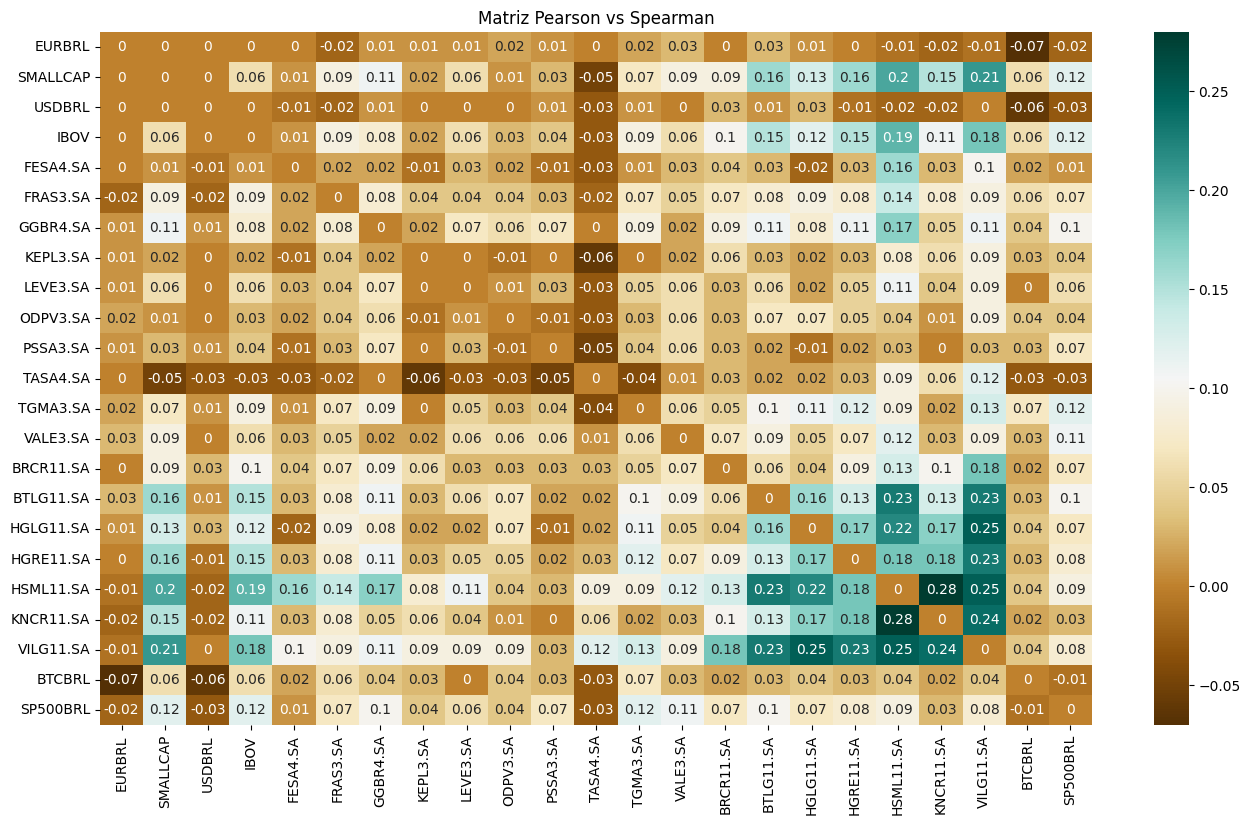

In [53]:
plt.figure(figsize = (16,9))

sns.heatmap(pearson_spearman,
             annot = True, cmap = 'BrBG')

plt.title('Matriz Pearson vs Spearman')

plt.show()

### 4.6 - Diferença de Kendall x Spearman:


1 - Similaridade nas classificações: tanto Kendall quanto Spearman são métodos não paramétricos que avaliam a concordância nas classificações das observações. O fato de as diferenças serem relativamente pequenas sugere que, em geral, as classificações dos ativos são semelhantes.

2 - Robustez a outliers: ambos os métodos são menos sensíveis a outliers em comparação com a correlação de Pearson. A maior diferença negativa pode indicar que outliers negativos estão influenciando mais a correlação de Kendall do que a de Spearman.

3 - Diferenças em relações monotônicas: a diferença positiva sugere que, em algumas situações, a correlação de Spearman pode ser ligeiramente mais sensível a relações montônicas do que a correlação de Kendall.

4 - Importância contextual: como sempre, é importante considerar o contexto dos seus dados e os objetivos da análise. Mesmo pequenas diferenças podem ter implicações significativas dependendo das decisões financeiras que você pretende tomar.


In [54]:
kendall_spearman = correlacao_kendall - correlacao_spearman

In [55]:
kendall_spearman

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,0.00,0.00,-0.18,-0.01,0.01,0.00,-0.01,0.01,0.01,0.02,...,0.00,0.01,0.01,0.01,0.00,0.03,0.00,0.00,-0.09,-0.16
SMALLCAP,0.00,0.00,0.01,-0.19,-0.11,-0.12,-0.13,-0.11,-0.13,-0.13,...,-0.10,-0.07,-0.04,-0.05,-0.04,-0.04,-0.02,-0.02,-0.04,-0.08
USDBRL,-0.18,0.01,0.00,-0.01,0.01,0.00,0.00,0.01,0.01,0.01,...,-0.01,0.02,0.02,0.01,0.00,0.04,0.00,0.01,-0.10,-0.17
IBOV,-0.01,-0.19,-0.01,0.00,-0.13,-0.10,-0.17,-0.10,-0.13,-0.11,...,-0.16,-0.06,-0.03,-0.04,-0.03,-0.03,-0.01,-0.03,-0.04,-0.10
FESA4.SA,0.01,-0.11,0.01,-0.13,0.00,-0.07,-0.13,-0.07,-0.08,-0.06,...,-0.11,-0.05,-0.03,-0.04,-0.04,-0.02,-0.02,-0.03,-0.03,-0.05
FRAS3.SA,0.00,-0.12,0.00,-0.10,-0.07,0.00,-0.06,-0.07,-0.08,-0.06,...,-0.04,-0.04,-0.03,-0.02,-0.04,-0.05,-0.01,-0.03,-0.03,-0.04
GGBR4.SA,-0.01,-0.13,0.00,-0.17,-0.13,-0.06,0.00,-0.07,-0.07,-0.05,...,-0.17,-0.03,-0.03,-0.03,-0.03,-0.03,-0.02,-0.03,-0.04,-0.08
KEPL3.SA,0.01,-0.11,0.01,-0.10,-0.07,-0.07,-0.07,0.00,-0.06,-0.04,...,-0.05,-0.03,-0.03,-0.03,-0.02,-0.04,-0.02,-0.03,-0.01,-0.03
LEVE3.SA,0.01,-0.13,0.01,-0.13,-0.08,-0.08,-0.07,-0.06,0.00,-0.07,...,-0.06,-0.06,-0.02,-0.04,-0.03,-0.04,-0.01,-0.02,-0.03,-0.04
ODPV3.SA,0.02,-0.13,0.01,-0.11,-0.06,-0.06,-0.05,-0.04,-0.07,0.00,...,-0.03,-0.04,-0.01,-0.01,0.00,-0.03,-0.01,0.00,0.01,-0.03


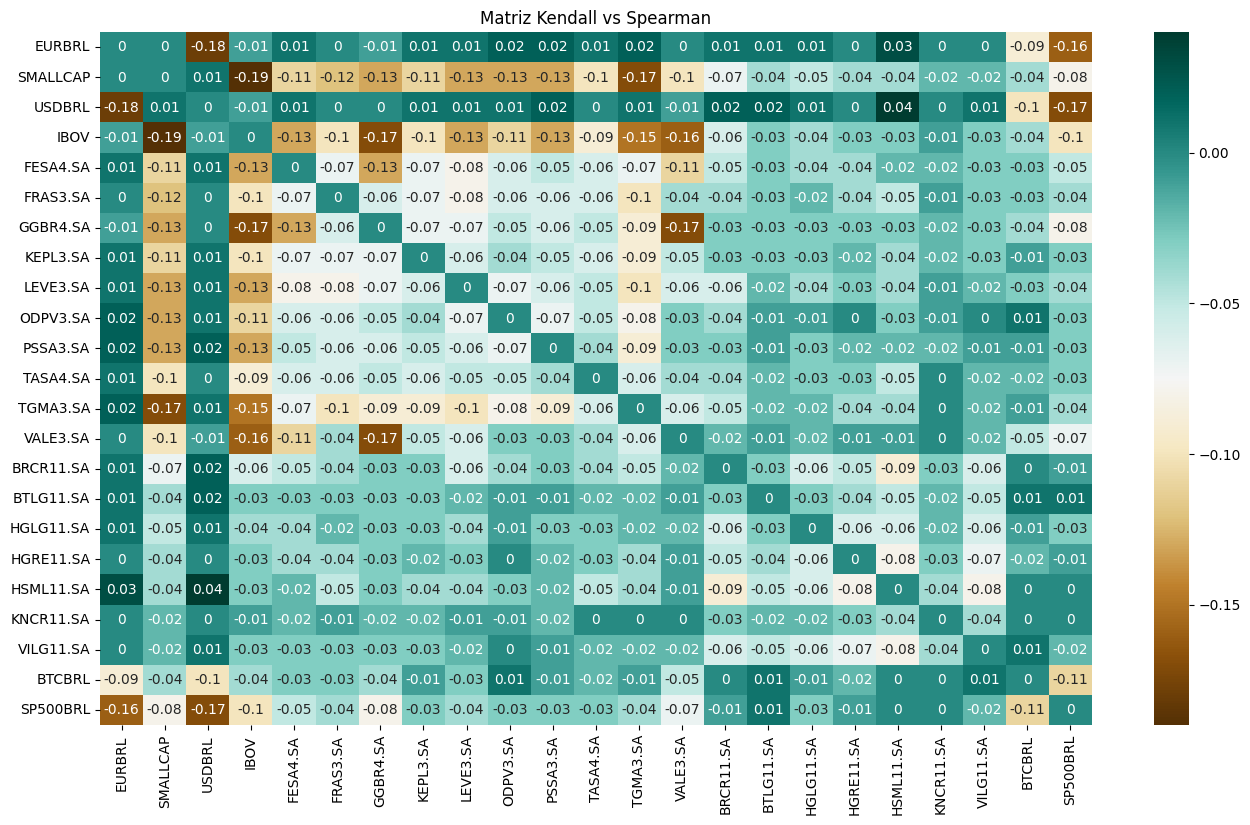

In [56]:
plt.figure(figsize = (16,9))

sns.heatmap(kendall_spearman,
             annot = True, cmap = 'BrBG')

plt.title('Matriz Kendall vs Spearman')

plt.show()